data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
The best k = 1, score = 1.0


<IPython.core.display.Javascript object>


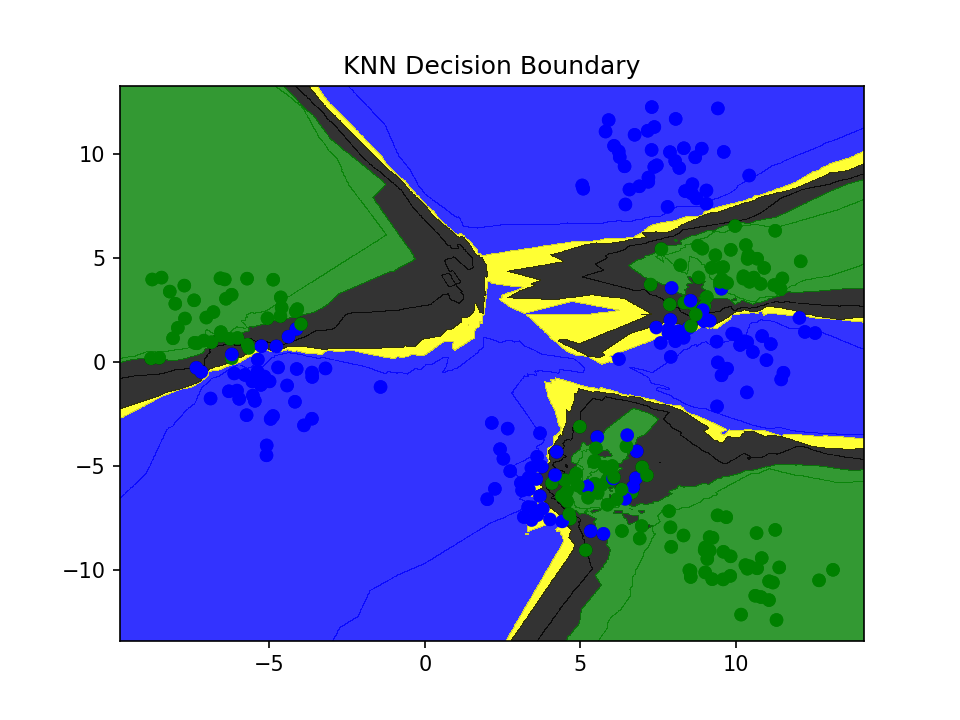

The best k = 11, score = 0.06400367309458217


In [5]:
#Task 1: KNN Classifier with the Iris Dataset
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print('data contains:', iris.keys())
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names) 
df_iris['label'] = y
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifiers for different K and find the best K
k_best = None
score_best = 0

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > score_best:
        k_best = k
        score_best = score
        

print(f'The best k = {k_best}, score = {score_best}')





#Task 2: KNN Regressor with a Synthetic Dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the synthetic dataset
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.3, random_state=42)

# Train KNN regressors for different K and find the best K
k_best = None
score_best = float('inf')

for k in range(1, 26):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    if score < score_best:
        k_best = k
        score_best = score
        

print(f'The best k = {k_best}, score = {score_best}')

# Visualize the decision boundary
knn_best = KNeighborsRegressor(n_neighbors=k_best)
knn_best.fit(X_train, y_train)

x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_bold)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundary")
plt.show()
